# Practical

##
### 21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.

In [1]:
# --- Import Libraries ---
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# --- Load the Iris Dataset ---
iris = load_iris()
X = iris.data
y = iris.target

# --- Split Data into Train and Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train SVM Classifier ---
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# --- Make Predictions ---
y_pred = model.predict(X_test)

# --- Evaluate Performance ---
print("SVM Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


SVM Classifier Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##
### 22.  Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies

In [2]:
# --- Import Libraries ---
from sklearn.datasets import load_wine

# --- Load the Wine Dataset ---
wine = load_wine()
X = wine.data
y = wine.target

# --- Split Data into Train/Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train SVM with Linear Kernel ---
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

# --- Train SVM with RBF Kernel ---
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

# --- Compare Results ---
print("SVM (Linear Kernel) Accuracy:", acc_linear)
print("SVM (RBF Kernel) Accuracy:", acc_rbf)
print("\nClassification Report (RBF Kernel):\n", classification_report(y_test, y_pred_rbf))


SVM (Linear Kernel) Accuracy: 1.0
SVM (RBF Kernel) Accuracy: 0.8055555555555556

Classification Report (RBF Kernel):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36



##
### 23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)

In [5]:
# --- Import Libraries ---
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# --- Load the California Housing Dataset ---
housing = fetch_california_housing()
X = housing.data
y = housing.target

# --- Split Data into Train/Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling (important for SVR) ---
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# --- Train SVM Regressor (RBF Kernel) ---
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled)

# --- Predict and Evaluate ---
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.3265498671062207


##
### 24.  Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.

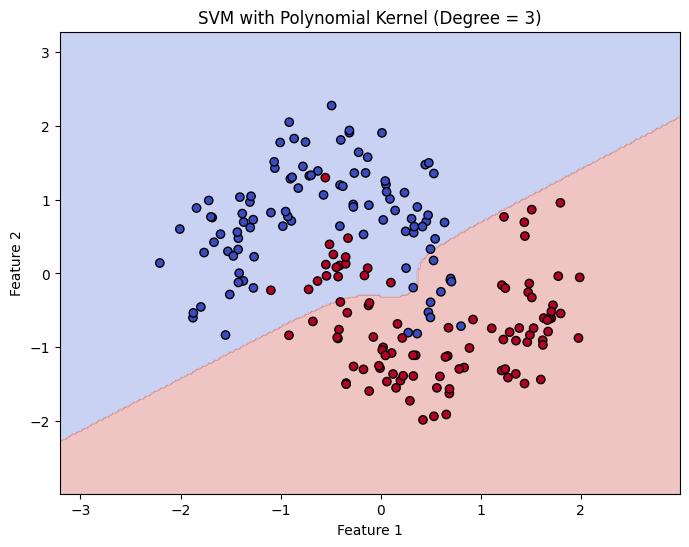

In [4]:
# --- Import Libraries ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# --- Load a 2D Dataset (for Visualization) ---
X, y = datasets.make_moons(n_samples=200, noise=0.2, random_state=42)

# --- Feature Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train SVM with Polynomial Kernel ---
model = SVC(kernel='poly', degree=3, C=1, gamma='scale')
model.fit(X_scaled, y)

# --- Create Meshgrid for Visualization ---
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# --- Predict over Meshgrid ---
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# --- Plot Decision Boundary ---
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("SVM with Polynomial Kernel (Degree = 3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


##
### 25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.

In [6]:
# --- Import Libraries ---
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Load the Breast Cancer Dataset ---
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# --- Split Data into Train and Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train Gaussian Naïve Bayes Model ---
model = GaussianNB()
model.fit(X_train, y_train)

# --- Predict and Evaluate ---
y_pred = model.predict(X_test)

print("Gaussian Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Gaussian Naïve Bayes Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[40  3]
 [ 0 71]]


##
### 26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

In [39]:
# --- Import Libraries ---
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# --- Load a Smaller Subset of 20 Newsgroups ---
categories = ['sci.space', 'comp.graphics', 'rec.sport.hockey', 'talk.politics.misc', 'sci.med']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

# --- Convert Text to TF-IDF Features ---
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
X_tfidf = vectorizer.fit_transform(newsgroups.data)

# --- Split Data into Train/Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, newsgroups.target, test_size=0.2, random_state=42)

# --- Train Multinomial Naïve Bayes Classifier ---
model = MultinomialNB()
model.fit(X_train, y_train)

# --- Predict and Evaluate ---
y_pred = model.predict(X_test)

print("Multinomial Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups.target_names))


Multinomial Naïve Bayes Accuracy: 0.9365079365079365

Classification Report:
                     precision    recall  f1-score   support

     comp.graphics       0.87      0.96      0.91       185
  rec.sport.hockey       0.97      0.98      0.97       188
           sci.med       0.92      0.93      0.93       193
         sci.space       0.96      0.92      0.94       209
talk.politics.misc       0.97      0.89      0.93       170

          accuracy                           0.94       945
         macro avg       0.94      0.94      0.94       945
      weighted avg       0.94      0.94      0.94       945



##
### 27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.

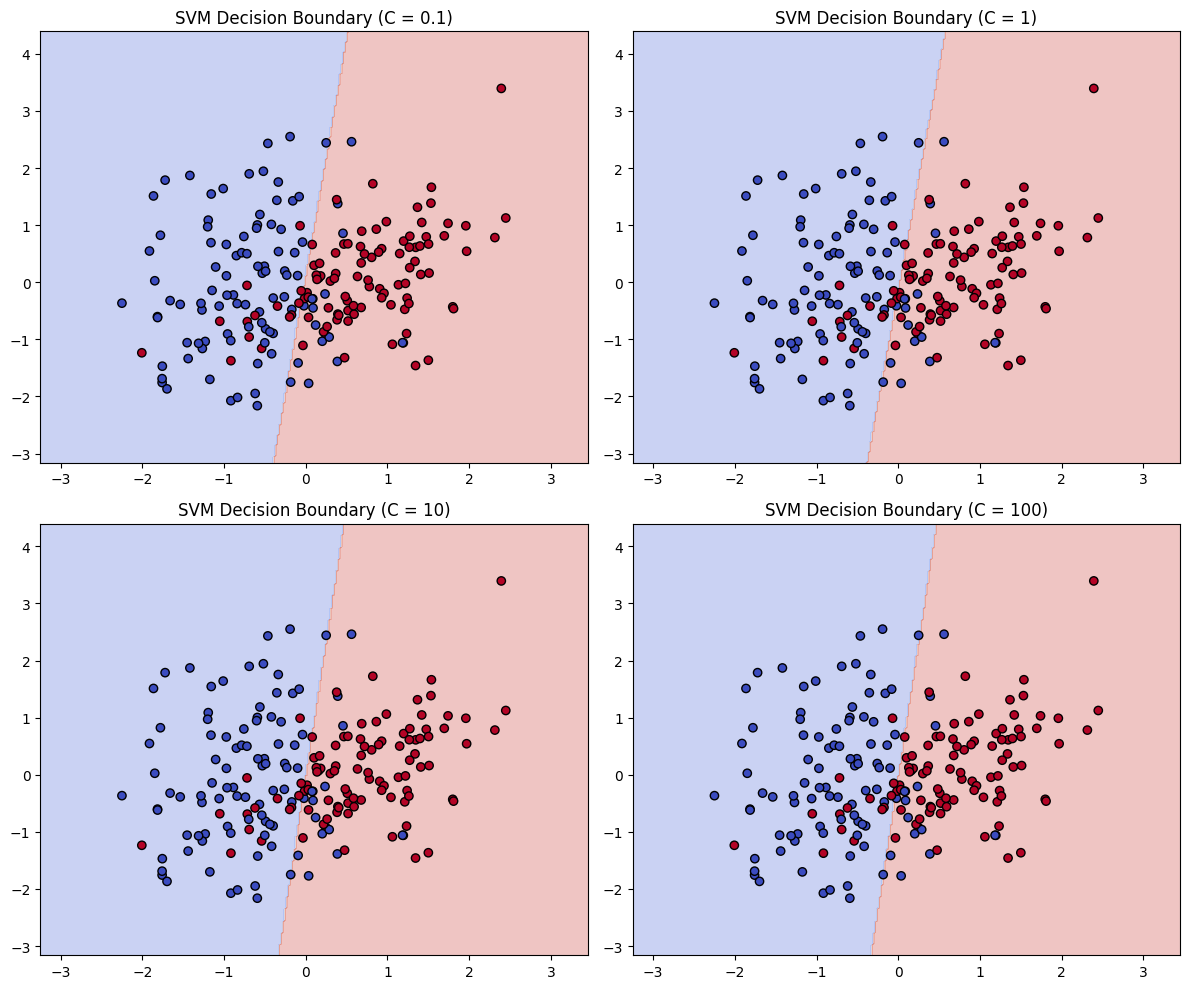

In [8]:
# --- Import Libraries ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# --- Generate 2D Dataset for Visualization ---
X, y = datasets.make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    random_state=42, n_clusters_per_class=1
)

# --- Standardize Features ---
scaler = StandardScaler()
X = scaler.fit_transform(X)

# --- Define Different C Values ---
C_values = [0.1, 1, 10, 100]

# --- Plot Decision Boundaries for Each C ---
plt.figure(figsize=(12, 10))

for i, C in enumerate(C_values, 1):
    model = SVC(kernel='linear', C=C, random_state=42)
    model.fit(X, y)

    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # Predict on meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(f"SVM Decision Boundary (C = {C})")

plt.tight_layout()
plt.show()


##
### 28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.

In [13]:
# --- Import Libraries ---
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# --- Generate a Binary Feature Dataset ---
X, y = make_classification(
    n_samples=500, n_features=10, n_informative=5, 
    n_redundant=0, n_classes=2, random_state=42
)

# --- Convert Features to Binary (0 or 1) ---
X_binary = np.where(X > 0, 1, 0)

# --- Split Data into Train/Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

# --- Train Bernoulli Naïve Bayes Classifier ---
model = BernoulliNB()
model.fit(X_train, y_train)

# --- Predict and Evaluate ---
y_pred = model.predict(X_test)

print("Bernoulli Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Bernoulli Naïve Bayes Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        48
           1       0.86      0.92      0.89        52

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



##
### 29.  Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.

In [14]:
# --- Import Libraries ---
from sklearn.datasets import load_wine

# --- Load Dataset ---
wine = load_wine()
X = wine.data
y = wine.target

# --- Split Data into Train/Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train SVM on Unscaled Data ---
svm_unscaled = SVC(kernel='rbf', gamma='scale')
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# --- Apply Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train SVM on Scaled Data ---
svm_scaled = SVC(kernel='rbf', gamma='scale')
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# --- Compare Results ---
print(f"SVM Accuracy (Unscaled Data): {acc_unscaled:.3f}")
print(f"SVM Accuracy (Scaled Data):   {acc_scaled:.3f}")


SVM Accuracy (Unscaled Data): 0.806
SVM Accuracy (Scaled Data):   1.000


##
### 30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.

In [15]:
# --- Import Libraries ---
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# --- Load the Iris Dataset ---
iris = load_iris()
X = iris.data
y = iris.target

# --- Split Data into Train/Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train Gaussian Naïve Bayes (Without Laplace Smoothing) ---
model_no_smooth = GaussianNB(var_smoothing=1e-9)
model_no_smooth.fit(X_train, y_train)
y_pred_no_smooth = model_no_smooth.predict(X_test)
acc_no_smooth = accuracy_score(y_test, y_pred_no_smooth)

# --- Train Gaussian Naïve Bayes (With Laplace Smoothing) ---
# Note: Laplace smoothing is simulated using higher var_smoothing
model_smooth = GaussianNB(var_smoothing=1e-2)
model_smooth.fit(X_train, y_train)
y_pred_smooth = model_smooth.predict(X_test)
acc_smooth = accuracy_score(y_test, y_pred_smooth)

# --- Compare Results ---
print("GaussianNB Accuracy (No Smoothing):", acc_no_smooth)
print("GaussianNB Accuracy (With Laplace Smoothing):", acc_smooth)

print("\nPredictions without Smoothing:", y_pred_no_smooth[:10])
print("Predictions with Smoothing:   ", y_pred_smooth[:10])


GaussianNB Accuracy (No Smoothing): 1.0
GaussianNB Accuracy (With Laplace Smoothing): 1.0

Predictions without Smoothing: [1 0 2 1 1 0 1 2 1 1]
Predictions with Smoothing:    [1 0 2 1 1 0 1 2 1 1]


##
### 31.  Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel).

In [16]:
# --- Import Libraries ---
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# --- Load Dataset ---
iris = load_iris()
X = iris.data
y = iris.target

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Define SVM Model ---
svm = SVC()

# --- Define Parameter Grid ---
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# --- Apply GridSearchCV ---
grid = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)
grid.fit(X_train, y_train)

# --- Evaluate Best Model ---
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)
print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.9583333333333334

Test Set Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##
### 32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.

In [17]:
# --- Import Libraries ---
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# --- Create an Imbalanced Dataset ---
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=2,
    n_classes=2, weights=[0.9, 0.1], random_state=42
)

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Train SVM without Class Weights ---
svm_unweighted = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_unweighted.fit(X_train, y_train)
y_pred_unweighted = svm_unweighted.predict(X_test)

# --- Train SVM with Balanced Class Weights ---
svm_weighted = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=42)
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)

# --- Compare Results ---
print("🔹 Without Class Weights:")
print("Accuracy:", accuracy_score(y_test, y_pred_unweighted))
print(classification_report(y_test, y_pred_unweighted))

print("\n🔹 With Class Weights (Balanced):")
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print(classification_report(y_test, y_pred_weighted))


🔹 Without Class Weights:
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       179
           1       0.92      0.57      0.71        21

    accuracy                           0.95       200
   macro avg       0.94      0.78      0.84       200
weighted avg       0.95      0.95      0.94       200


🔹 With Class Weights (Balanced):
Accuracy: 0.885
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       179
           1       0.47      0.86      0.61        21

    accuracy                           0.89       200
   macro avg       0.73      0.87      0.77       200
weighted avg       0.93      0.89      0.90       200



##
### 33.  Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

In [18]:
# --- Import Libraries ---
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# --- Sample Email Dataset ---
emails = [
    "Congratulations! You have won a $1,000 Walmart gift card. Click here to claim now.",
    "Hey John, can we reschedule the meeting for tomorrow?",
    "Urgent! Your account has been compromised. Verify your details immediately.",
    "Don't miss out on this once-in-a-lifetime investment opportunity!",
    "Lunch at 1 PM?",
    "Limited time offer: Buy 1 get 1 free on all products!",
    "Project update attached. Please review.",
    "Win a free iPhone by completing this short survey!",
    "Reminder: Your car service appointment is tomorrow.",
    "Final notice: Your payment is pending. Click to resolve."
]

labels = [1, 0, 1, 1, 0, 1, 0, 1, 0, 1]  # 1 = Spam, 0 = Not Spam

# --- Split Dataset ---
X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.3, random_state=42)

# --- Convert Text Data to TF-IDF Features ---
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# --- Train Naïve Bayes Model ---
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# --- Predict and Evaluate ---
y_pred = model.predict(X_test_tfidf)

print("Naïve Bayes Spam Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Not Spam", "Spam"]))


Naïve Bayes Spam Classifier Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.00      0.00      0.00         2
        Spam       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



C:\Users\Ankit Ghosal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ankit Ghosal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ankit Ghosal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

##
### 34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.

In [19]:
# --- Import Libraries ---
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# --- Load Dataset ---
wine = load_wine()
X = wine.data
y = wine.target

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling for SVM ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train SVM Classifier ---
svm_model = SVC(kernel='rbf', gamma='scale', C=1)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# --- Train Naïve Bayes Classifier ---
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# --- Compare Accuracies ---
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_nb = accuracy_score(y_test, y_pred_nb)

print(f"SVM Accuracy: {acc_svm:.3f}")
print(f"Naïve Bayes Accuracy: {acc_nb:.3f}")

print("\n--- SVM Classification Report ---")
print(classification_report(y_test, y_pred_svm))

print("\n--- Naïve Bayes Classification Report ---")
print(classification_report(y_test, y_pred_nb))



SVM Accuracy: 1.000
Naïve Bayes Accuracy: 1.000

--- SVM Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


--- Naïve Bayes Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



##
### 35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.

In [21]:
# --- Import Libraries ---
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

# --- Load Dataset ---
wine = load_wine()
X = wine.data
y = wine.target

# --- Split Data into Train/Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train Naïve Bayes without Feature Selection ---
nb_full = GaussianNB()
nb_full.fit(X_train, y_train)
y_pred_full = nb_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

# --- Apply Feature Selection (Select Top 5 Features) ---
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# --- Train Naïve Bayes with Selected Features ---
nb_selected = GaussianNB()
nb_selected.fit(X_train_selected, y_train)
y_pred_selected = nb_selected.predict(X_test_selected)
acc_selected = accuracy_score(y_test, y_pred_selected)

# --- Compare Results ---
print(f"Naïve Bayes Accuracy (All Features): {acc_full:.3f}")
print(f"Naïve Bayes Accuracy (Top 5 Selected Features): {acc_selected:.3f}")

# --- Display Selected Feature Names ---
selected_features = [wine.feature_names[i] for i in selector.get_support(indices=True)]
print("\nSelected Features:", selected_features)


Naïve Bayes Accuracy (All Features): 1.000
Naïve Bayes Accuracy (Top 5 Selected Features): 0.944

Selected Features: ['alcohol', 'flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines', 'proline']


##
### 36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.

In [22]:
# --- Import Libraries ---
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# --- Load the Wine Dataset ---
wine = load_wine()
X = wine.data
y = wine.target

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train SVM with One-vs-Rest (OvR) Strategy ---
svm_ovr = SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)
svm_ovr.fit(X_train_scaled, y_train)
y_pred_ovr = svm_ovr.predict(X_test_scaled)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

# --- Train SVM with One-vs-One (OvO) Strategy ---
svm_ovo = SVC(kernel='rbf', decision_function_shape='ovo', random_state=42)
svm_ovo.fit(X_train_scaled, y_train)
y_pred_ovo = svm_ovo.predict(X_test_scaled)
acc_ovo = accuracy_score(y_test, y_pred_ovo)

# --- Compare Results ---
print(f"SVM Accuracy (One-vs-Rest): {acc_ovr:.3f}")
print(f"SVM Accuracy (One-vs-One):  {acc_ovo:.3f}")

print("\n--- Classification Report (OvR) ---")
print(classification_report(y_test, y_pred_ovr))

print("\n--- Classification Report (OvO) ---")
print(classification_report(y_test, y_pred_ovo))


SVM Accuracy (One-vs-Rest): 1.000
SVM Accuracy (One-vs-One):  1.000

--- Classification Report (OvR) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


--- Classification Report (OvO) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



##
### 37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.

In [24]:
# --- Import Libraries ---
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# --- Load the Breast Cancer Dataset ---
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Define and Train Models with Different Kernels ---
kernels = ['linear', 'poly', 'rbf']
accuracies = {}

for kernel in kernels:
    # degree only affects polynomial kernel
    model = SVC(kernel=kernel, C=1, gamma='scale', degree=3, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies[kernel] = acc
    print(f"\n--- Kernel: {kernel.upper()} ---")
    print(f"Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred))

# --- Compare Results ---
print("\n📊 Kernel Accuracy Comparison:")
for kernel, acc in accuracies.items():
    print(f"{kernel.capitalize()} Kernel: {acc:.3f}")



--- Kernel: LINEAR ---
Accuracy: 0.956
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


--- Kernel: POLY ---
Accuracy: 0.868
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        43
           1       0.83      1.00      0.90        71

    accuracy                           0.87       114
   macro avg       0.91      0.83      0.85       114
weighted avg       0.89      0.87      0.86       114


--- Kernel: RBF ---
Accuracy: 0.982
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg 

##
### 38.  Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.

In [25]:
# --- Import Libraries ---
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np

# --- Load Dataset ---
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# --- Feature Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Define Model ---
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# --- Define Stratified K-Fold ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Perform Cross-Validation ---
scores = cross_val_score(svm_model, X_scaled, y, cv=skf, scoring='accuracy')

# --- Display Results ---
print("Fold Accuracies:", scores)
print("Average Accuracy:", np.mean(scores).round(3))
print("Standard Deviation:", np.std(scores).round(3))


Fold Accuracies: [0.99122807 0.93859649 0.97368421 0.99122807 0.98230088]
Average Accuracy: 0.975
Standard Deviation: 0.02


##
### 39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.

In [26]:
# --- Import Libraries ---
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# --- Load Dataset ---
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Model 1: Without Custom Priors (Default Equal Priors) ---
model_default = GaussianNB()
model_default.fit(X_train, y_train)
y_pred_default = model_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)

# --- Model 2: Custom Priors (Higher weight to class 0) ---
model_custom = GaussianNB(priors=[0.7, 0.3])
model_custom.fit(X_train, y_train)
y_pred_custom = model_custom.predict(X_test)
acc_custom = accuracy_score(y_test, y_pred_custom)

# --- Compare Results ---
print("🔹 Default Priors:")
print(f"Accuracy: {acc_default:.3f}")
print(classification_report(y_test, y_pred_default, target_names=cancer.target_names))

print("\n🔹 Custom Priors [0.7, 0.3]:")
print(f"Accuracy: {acc_custom:.3f}")
print(classification_report(y_test, y_pred_custom, target_names=cancer.target_names))


🔹 Default Priors:
Accuracy: 0.939
              precision    recall  f1-score   support

   malignant       0.93      0.90      0.92        42
      benign       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


🔹 Custom Priors [0.7, 0.3]:
Accuracy: 0.930
              precision    recall  f1-score   support

   malignant       0.90      0.90      0.90        42
      benign       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



##
### 40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.

In [27]:
# --- Import Libraries ---
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# --- Load Dataset ---
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train SVM Classifier Without Feature Selection ---
svm_full = SVC(kernel='linear', C=1, random_state=42)
svm_full.fit(X_train_scaled, y_train)
y_pred_full = svm_full.predict(X_test_scaled)
acc_full = accuracy_score(y_test, y_pred_full)

# --- Apply Recursive Feature Elimination (RFE) ---
rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

# --- Train SVM on Selected Features ---
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

svm_rfe = SVC(kernel='linear', C=1, random_state=42)
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, y_pred_rfe)

# --- Compare Results ---
print(f"SVM Accuracy (All Features): {acc_full:.3f}")
print(f"SVM Accuracy (After RFE, Top 10 Features): {acc_rfe:.3f}")

# --- Display Selected Feature Names ---
selected_features = [cancer.feature_names[i] for i in range(len(rfe.support_)) if rfe.support_[i]]
print("\nSelected Features by RFE:")
print(selected_features)


SVM Accuracy (All Features): 0.956
SVM Accuracy (After RFE, Top 10 Features): 0.974

Selected Features by RFE:
[np.str_('mean compactness'), np.str_('mean concavity'), np.str_('mean concave points'), np.str_('radius error'), np.str_('area error'), np.str_('fractal dimension error'), np.str_('worst radius'), np.str_('worst texture'), np.str_('worst area'), np.str_('worst fractal dimension')]


##
### 41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.

In [29]:
# --- Import Libraries ---
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# --- Load Dataset ---
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train SVM Classifier ---
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# --- Make Predictions ---
y_pred = svm_model.predict(X_test_scaled)

# --- Evaluate Using Precision, Recall, F1 ---
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-Score:  {f1:.3f}")

# --- Detailed Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))


Precision: 0.973
Recall:    1.000
F1-Score:  0.986

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



##
### 42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).

In [31]:
# --- Import Libraries ---
from sklearn.metrics import log_loss

# --- Load Dataset ---
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling (Optional but helps stability) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train Naïve Bayes Classifier ---
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# --- Predict Probabilities (needed for Log Loss) ---
y_pred_proba = nb_model.predict_proba(X_test_scaled)

# --- Compute Log Loss ---
loss = log_loss(y_test, y_pred_proba)

print(f"Log Loss (Cross-Entropy Loss): {loss:.4f}")


Log Loss (Cross-Entropy Loss): 0.2051


##
### 43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

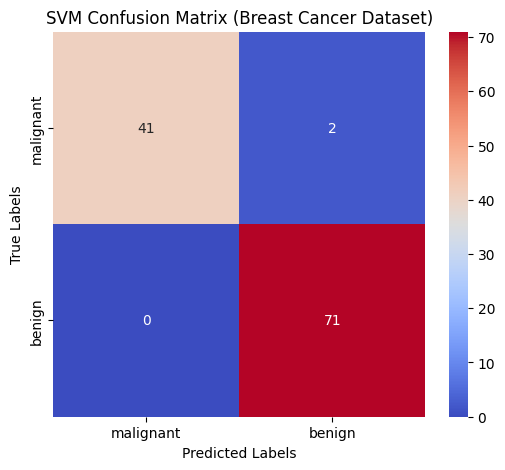


Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [33]:
# --- Import Libraries ---
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load Dataset ---
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train SVM Classifier ---
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# --- Predict on Test Data ---
y_pred = svm_model.predict(X_test_scaled)

# --- Compute Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
labels = cancer.target_names  # ['malignant', 'benign']

# --- Visualize Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.title("SVM Confusion Matrix (Breast Cancer Dataset)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# --- Print Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=labels))


##
### 44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.

In [35]:
# --- Import Libraries ---
from sklearn.metrics import mean_absolute_error


# --- Load the California Housing Dataset ---
housing = fetch_california_housing()
X = housing.data
y = housing.target

# --- Use a Subset for Speed (Optional) ---
np.random.seed(42)
subset_idx = np.random.choice(len(X), 2000, replace=False)
X = X[subset_idx]
y = y[subset_idx]

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling ---
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# --- Train SVR Model (RBF Kernel) ---
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled)

# --- Predict and Inverse Transform ---
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# --- Evaluate Using Mean Absolute Error (MAE) ---
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 0.4072


##
### 45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.

ROC-AUC Score: 0.997


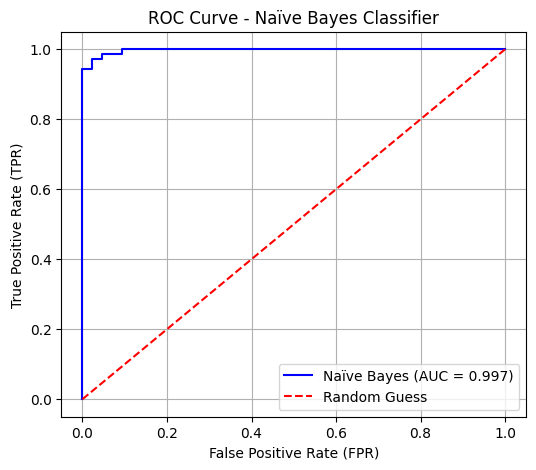

In [37]:
# --- Import Libraries ---
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# --- Load Dataset ---
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train Naïve Bayes Classifier ---
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# --- Predict Probabilities ---
y_pred_proba = nb_model.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class

# --- Compute ROC-AUC Score ---
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# --- Plot ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'Naïve Bayes (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title("ROC Curve - Naïve Bayes Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(True)
plt.show()


##
### 46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

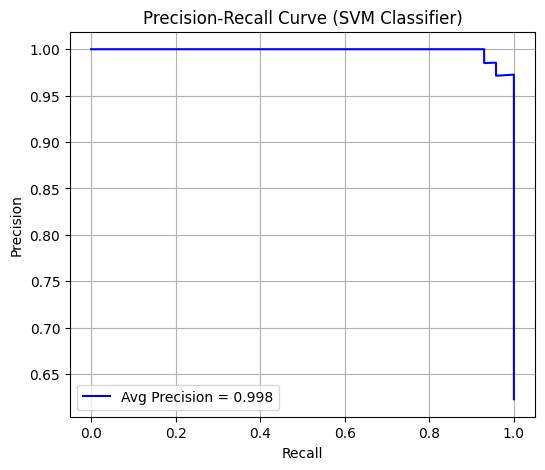

In [38]:
# --- Import Libraries ---
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# --- Load Dataset ---
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train SVM Classifier ---
svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# --- Predict Probabilities ---
y_scores = svm_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for positive class

# --- Compute Precision-Recall Values ---
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# --- Plot Precision-Recall Curve ---
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='blue', label=f'Avg Precision = {avg_precision:.3f}')
plt.title("Precision-Recall Curve (SVM Classifier)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()
